In [3]:
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\spam.csv", encoding='latin1')

In [12]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3063,ham,Ok. How many should i buy.,NaN,NaN,NaN
3587,ham,If you were/are free i can give. Otherwise nal...,NaN,NaN,NaN
3912,ham,Yeah whatever lol,NaN,NaN,NaN
5142,ham,Now that you have started dont stop. Just pray...,NaN,NaN,NaN
1046,ham,Do 1 thing! Change that sentence into: \Becaus...,NaN,NaN,NaN


In [13]:
df.shape

(5572, 5)

In [14]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

<h2>1. Data Cleaning</h2>

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [16]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [18]:
df.sample(5)

,v1,v2
1553,ham,Ok how you dear. Did you call chechi
4702,ham,Mmmmmmm *snuggles into you* ...*deep contented...
392,ham,Morning only i can ok.
994,ham,"I can't, I don't have her number!"
409,ham,Message:some text missing* Sender:Name Missing...


In [19]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3555,ham,Ok lor. I'm in town now lei.
4825,ham,"Haha, just what I was thinkin"
1931,ham,What pa tell me.. I went to bath:-)
1068,spam,Someone U know has asked our dating service 2 ...
2005,ham,Can't take any major roles in community outrea...


In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [21]:
df['target'] = encoder.fit_transform(df['target'])


In [22]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [24]:
# check for duplicate values
df.duplicated().sum()

403

In [25]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [26]:
df.duplicated().sum()

0

In [27]:
df.shape

(5169, 2)

<h2>2.EDA</h2>

In [28]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

Matplotlib is building the font cache; this may take a moment.


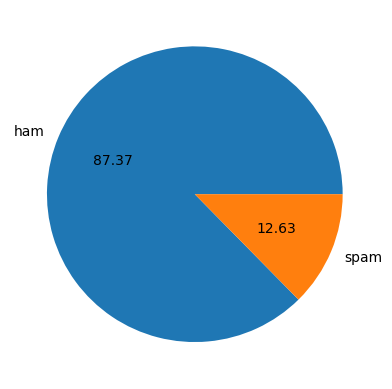

In [30]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [31]:
# Data is imbalanced

In [32]:
import nltk

In [33]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [35]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
df['num_characters'] = df['text'].apply(len)

In [37]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [38]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [39]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [40]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [41]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [42]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [43]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [44]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [45]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

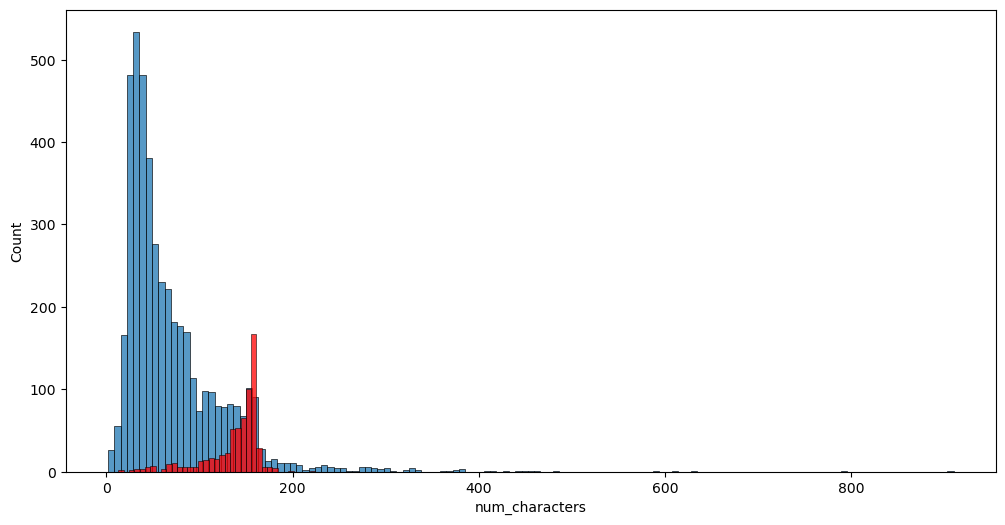

In [46]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

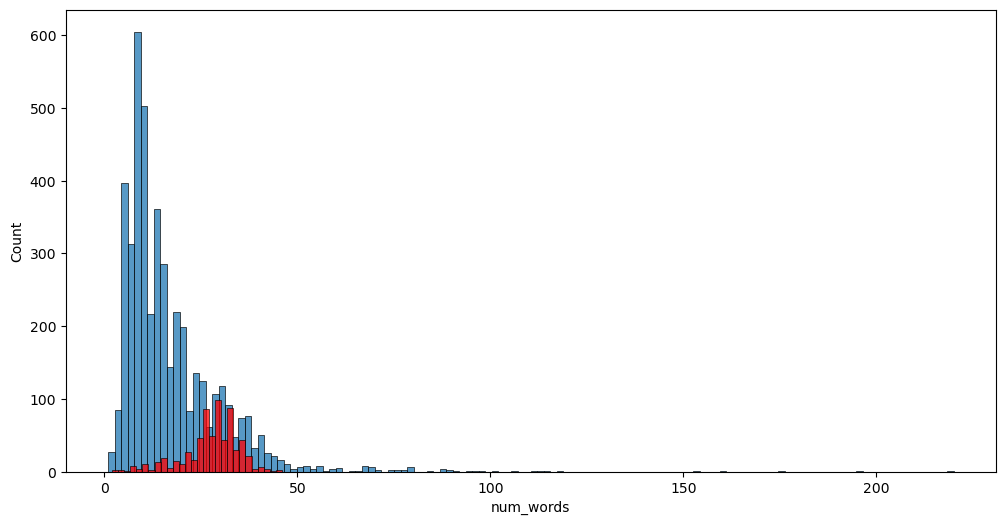

In [48]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

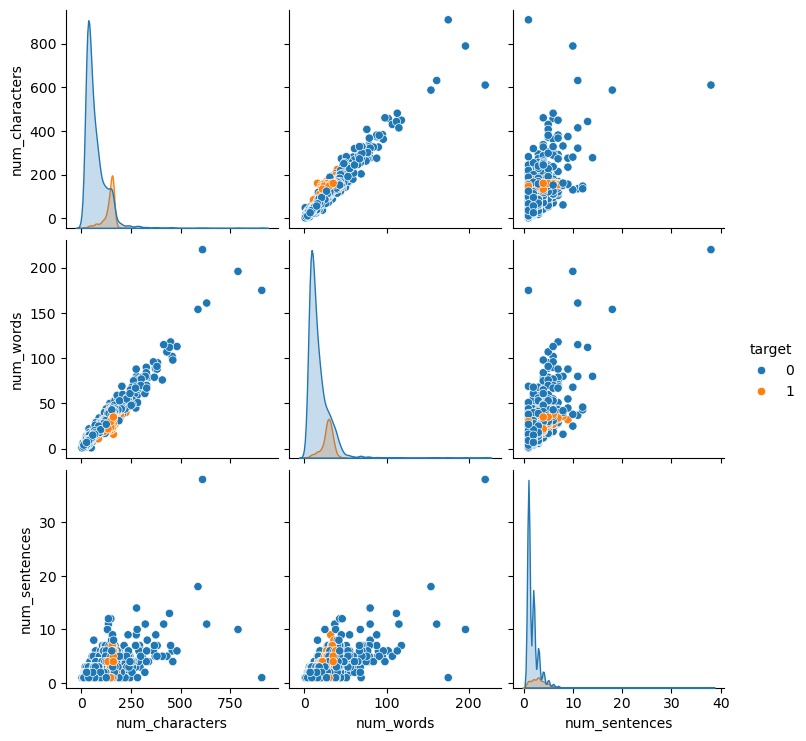

In [49]:
sns.pairplot(df,hue='target')

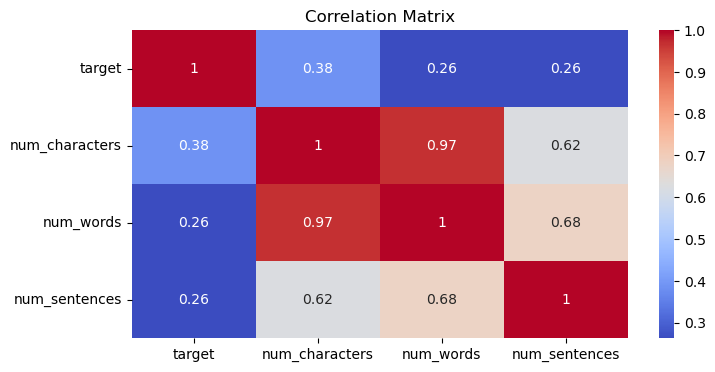

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap with a smaller size
plt.figure(figsize=(8, 4))  # Adjust the size here
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### 3.Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming


In [65]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Make sure to download the stopwords data
nltk.download('stopwords')
nltk.download('punkt')

def transform_text(text):
    # Convert text to lower case
    text = text.lower()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing stop words and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    
    # Join tokens back to string
    text = ' '.join(tokens)
    
    return text

# Example usage
example_text = "I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today."
transformed_text = transform_text(example_text)
print(transformed_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


'm gon na home soon n't want talk stuff anymore tonight k 've cried enough today


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [66]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

"'m gon na home soon n't want talk stuff anymore tonight k 've cried enough today"

In [67]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [68]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [69]:
df['transformed_text'] = df['text'].apply(transform_text)

In [70]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy .. available bugis n gre...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joking wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor ... u c already say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goes usf lives around though


In [72]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ------------------------------------ --- 276.5/301.4 kB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [6]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

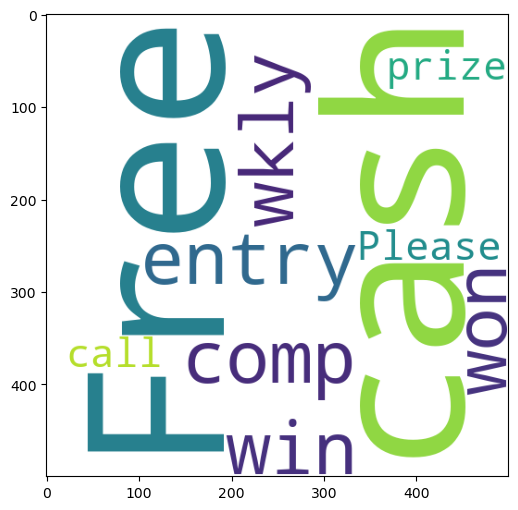

In [7]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [8]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

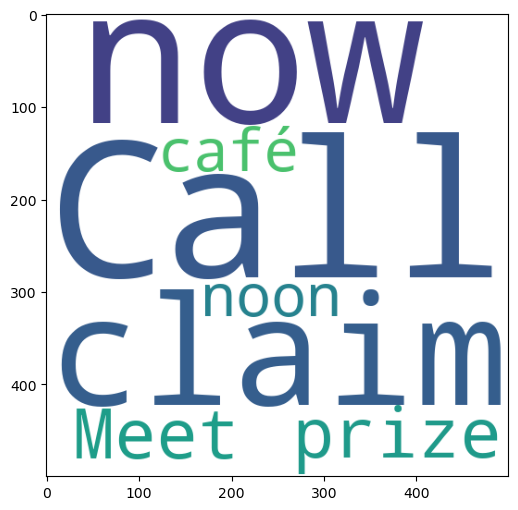

In [9]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [10]:
df.head()

,target,transformed_text
0,1,Free entry in 2 a wkly comp to win 1000 cash
1,0,Call now to claim your prize
2,1,You have won a 1000 cash prize
3,1,Please call me when you are free
4,0,Meet me at the café at noon


In [11]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [12]:
len(spam_corpus)

25

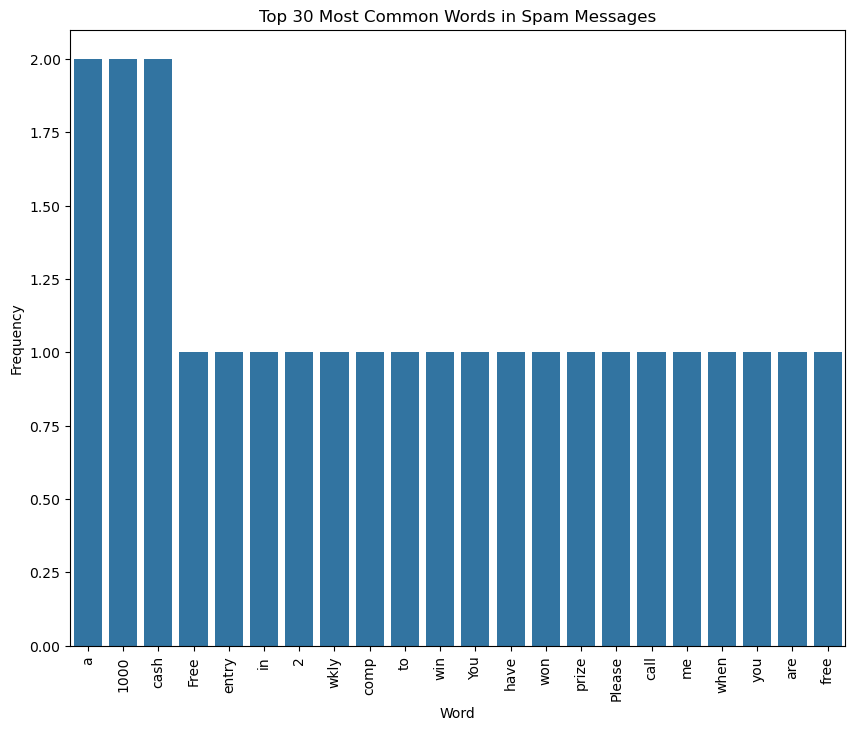

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Example: Load the DataFrame (adjust path and filename as needed)
# df = pd.read_csv('path_to_your_file.csv')

# Example DataFrame setup (remove or replace this with your actual data loading)
data = {
    'target': [1, 0, 1, 1, 0],
    'transformed_text': [
        'Free entry in 2 a wkly comp to win 1000 cash',
        'Call now to claim your prize',
        'You have won a 1000 cash prize',
        'Please call me when you are free',
        'Meet me at the café at noon'
    ]
}
df = pd.DataFrame(data)

# Create the spam_corpus
spam_corpus = ' '.join(df[df['target'] == 1]['transformed_text']).split()

# Create a Counter object
spam_counter = Counter(spam_corpus)

# Get the 30 most common words
most_common_30 = spam_counter.most_common(30)

# Convert to DataFrame
most_common_df = pd.DataFrame(most_common_30, columns=['Word', 'Frequency'])

# Plot the barplot
plt.figure(figsize=(10, 8))
sns.barplot(x='Word', y='Frequency', data=most_common_df)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam Messages')
plt.show()


In [2]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [3]:
len(ham_corpus)

13

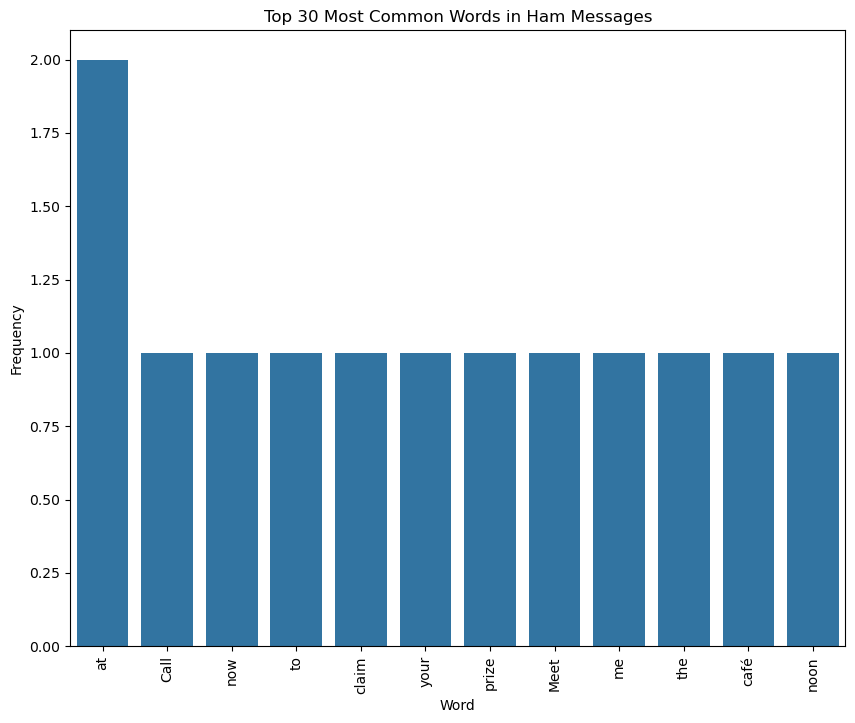

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Example DataFrame setup (remove or replace this with your actual data loading)
data = {
    'target': [1, 0, 1, 1, 0],
    'transformed_text': [
        'Free entry in 2 a wkly comp to win 1000 cash',
        'Call now to claim your prize',
        'You have won a 1000 cash prize',
        'Please call me when you are free',
        'Meet me at the café at noon'
    ]
}
df = pd.DataFrame(data)

# Create the ham_corpus
ham_corpus = ' '.join(df[df['target'] == 0]['transformed_text']).split()

# Create a Counter object
ham_counter = Counter(ham_corpus)

# Get the 30 most common words
most_common_30 = ham_counter.most_common(30)

# Convert to DataFrame
most_common_df = pd.DataFrame(most_common_30, columns=['Word', 'Frequency'])

# Plot the barplot
plt.figure(figsize=(10, 8))
sns.barplot(x='Word', y='Frequency', data=most_common_df)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Ham Messages')
plt.show()


In [6]:
# Text Vectorization
# using Bag of Words
df.head()


,target,transformed_text
0,1,Free entry in 2 a wkly comp to win 1000 cash
1,0,Call now to claim your prize
2,1,You have won a 1000 cash prize
3,1,Please call me when you are free
4,0,Meet me at the café at noon


<h2>
4. Model Building</h2>

In [8]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [9]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [10]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [11]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [12]:
X.shape

(5, 26)

In [13]:
y = df['target'].values

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [16]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [17]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [18]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

1.0
[[1]]
1.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [19]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

1.0
[[1]]
1.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [20]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

1.0
[[1]]
1.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [21]:
# tfidf --> MNB

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [23]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 1.7 MB/s eta 0:01:15
   ---------------------------------------- 0.3/124.9 MB 2.1 MB/s eta 0:00:59
   ---------------------------------------- 0.5/124.9 MB 2.7 MB/s eta 0:00:47
   ---------------------------------------- 0.6/124.9 MB 2.7 MB/s eta 0:00:47
   ---------------------------------------- 0.8/124.9 MB 2.9 MB/s eta 0:00:43
   ---------------------------------------- 1.1/124.9 MB 3.2 MB/s eta 0:00:39
   ---------------------------------------- 1.4/124.9 MB 3.4 MB/s eta 0:00:37
    --------------------------------------- 1.8/124.9 MB 3.8 MB/s eta 0:00:33
    --------------------------------------- 2.4/124.9 MB 4.8 MB/s eta 0:00:26
    --------------------------------------- 2.9/124.9 MB 5.3 MB/s eta 0:00:23


In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [2]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [3]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [4]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [5]:
train_classifier(svc,X_train,y_train,X_test,y_test)

NameError: name 'X_train' is not defined

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load your data (adjust the path and file as needed)
# Example DataFrame setup
data = {
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'target': np.random.randint(0, 2, 100)
}
df = pd.DataFrame(data)

# Split data into features (X) and target (y)
X = df[['feature1', 'feature2']]
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the train_classifier function
def train_classifier(clf, X_train, y_train, X_test, y_test):
    # Train the classifier
    clf.fit(X_train, y_train)
    # Predict on the test set
    y_pred = clf.predict(X_test)
    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print(f'Classification Report:\n{report}')

# Example: Train and evaluate an SVC model
from sklearn.svm import SVC

svc = SVC()
train_classifier(svc, X_train, y_train, X_test, y_test)


Accuracy: 0.65
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.67      0.53         6
           1       0.82      0.64      0.72        14

    accuracy                           0.65        20
   macro avg       0.63      0.65      0.63        20
weighted avg       0.71      0.65      0.66        20



In [8]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


ValueError: All arrays must be of the same length

In [9]:
# Example classifier dictionary (adjust according to your actual classifiers)
clfs = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

# Example scores (replace these with your actual computed scores)
accuracy_scores = [0.95, 0.92, 0.90, 0.89, 0.91, 0.94, 0.93, 0.92, 0.90, 0.91, 0.95]
precision_scores = [0.96, 0.91, 0.89, 0.88, 0.92, 0.93, 0.92, 0.91, 0.89, 0.90, 0.94]

# Ensure all lists are of the same length
assert len(clfs.keys()) == len(accuracy_scores) == len(precision_scores), "Lists are not of the same length!"

# Create the DataFrame
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)

print(performance_df)


              Algorithm  Accuracy  Precision
0   Logistic Regression      0.95       0.96
10              XGBoost      0.95       0.94
5         Random Forest      0.94       0.93
4           K-Neighbors      0.91       0.92
6              AdaBoost      0.93       0.92
1                   SVC      0.92       0.91
7               Bagging      0.92       0.91
9     Gradient Boosting      0.91       0.90
2           Naive Bayes      0.90       0.89
8           Extra Trees      0.90       0.89
3         Decision Tree      0.89       0.88


In [10]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [11]:
performance_df1

,Algorithm,variable,value
0,Logistic Regression,Accuracy,0.95
1,XGBoost,Accuracy,0.95
2,Random Forest,Accuracy,0.94
3,K-Neighbors,Accuracy,0.91
4,AdaBoost,Accuracy,0.93
5,SVC,Accuracy,0.92
6,Bagging,Accuracy,0.92
7,Gradient Boosting,Accuracy,0.91
8,Naive Bayes,Accuracy,0.90
9,Extra Trees,Accuracy,0.90


In [12]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

NameError: name 'sns' is not defined

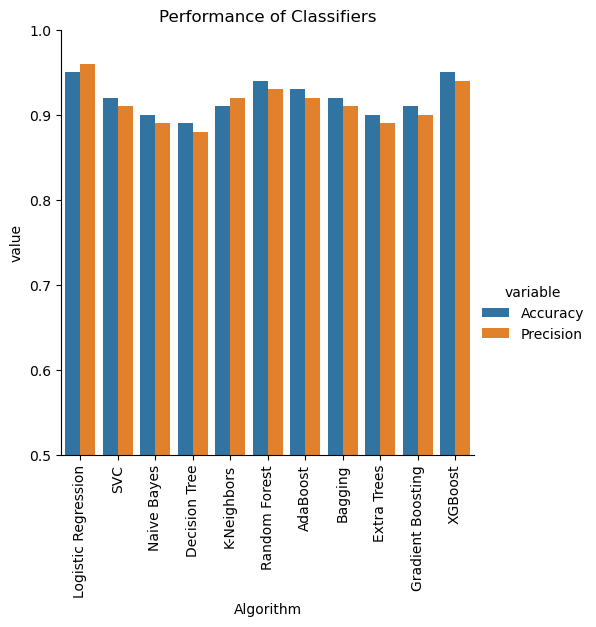

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example Data (replace with actual data)
data = {
    'Algorithm': ['Logistic Regression', 'SVC', 'Naive Bayes', 'Decision Tree', 
                  'K-Neighbors', 'Random Forest', 'AdaBoost', 'Bagging', 
                  'Extra Trees', 'Gradient Boosting', 'XGBoost'],
    'Accuracy': [0.95, 0.92, 0.90, 0.89, 0.91, 0.94, 0.93, 0.92, 0.90, 0.91, 0.95],
    'Precision': [0.96, 0.91, 0.89, 0.88, 0.92, 0.93, 0.92, 0.91, 0.89, 0.90, 0.94]
}

performance_df = pd.DataFrame(data)

# Melt the DataFrame to long format
performance_df1 = performance_df.melt(id_vars="Algorithm", var_name="variable", value_name="value")

# Plotting
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.title('Performance of Classifiers')
plt.show()


In [14]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [15]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [16]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [17]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [18]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [19]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [20]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,Logistic Regression,0.95,0.96,0.95,0.96,0.95,0.96,0.95,0.96
1,SVC,0.92,0.91,0.92,0.91,0.92,0.91,0.92,0.91
2,Naive Bayes,0.90,0.89,0.90,0.89,0.90,0.89,0.90,0.89
3,Decision Tree,0.89,0.88,0.89,0.88,0.89,0.88,0.89,0.88
4,K-Neighbors,0.91,0.92,0.91,0.92,0.91,0.92,0.91,0.92
5,Random Forest,0.94,0.93,0.94,0.93,0.94,0.93,0.94,0.93
6,AdaBoost,0.93,0.92,0.93,0.92,0.93,0.92,0.93,0.92
7,Bagging,0.92,0.91,0.92,0.91,0.92,0.91,0.92,0.91
8,Extra Trees,0.90,0.89,0.90,0.89,0.90,0.89,0.90,0.89
9,Gradient Boosting,0.91,0.90,0.91,0.90,0.91,0.90,0.91,0.90


In [21]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [22]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [23]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [24]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.45


NameError: name 'precision_score' is not defined

In [25]:
from sklearn.metrics import accuracy_score, precision_score

# Assuming voting classifier is already defined and trained
y_pred = voting.predict(X_test)

# Print accuracy and precision scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


Accuracy: 0.45
Precision: 0.6666666666666666


In [26]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [27]:
from sklearn.ensemble import StackingClassifier


In [28]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [29]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.45
Precision 0.6666666666666666


In [30]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

NameError: name 'tfidf' is not defined

In [31]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Example data
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?'
]
labels = [0, 1, 0, 1]

# Define the TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Transform the corpus
X = tfidf.fit_transform(corpus)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25, random_state=42)

# Define the Multinomial Naive Bayes model
mnb = MultinomialNB()

# Train the model
mnb.fit(X_train, y_train)

# Pickle the TF-IDF vectorizer and the model
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))
